<a href="https://colab.research.google.com/github/antonysandesh/forcasting-of-covid-19-cases/blob/main/Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasets/owid-covid-data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73176,ZWE,Africa,Zimbabwe,2021-03-02,36148.0,33.0,34.000,1472.0,4.0,3.429,2432.092,2.220,2.288,99.038,0.269,0.231,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2207.0,385408.0,25.931,0.148,1911.0,0.129,0.018,56.2,tests performed,25077.0,25077.0,NaN,3621.0,3005.0,0.17,0.17,NaN,202.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73177,ZWE,Africa,Zimbabwe,2021-03-03,36179.0,31.0,31.286,1478.0,6.0,3.143,2434.177,2.086,2.105,99.442,0.404,0.211,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1903.0,387311.0,26.059,0.128,1925.0,0.130,0.016,61.5,tests performed,27970.0,27970.0,NaN,2893.0,2871.0,0.19,0.19,NaN,193.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73178,ZWE,Africa,Zimbabwe,2021-03-04,36223.0,44.0,32.714,1483.0,5.0,3.571,2437.138,2.960,2.201,99.778,0.336,0.240,0.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2054.0,389365.0,26.197,0.138,1795.0,0.121,0.018,54.9,tests performed,30658.0,30658.0,NaN,2688.0,2807.0,0.21,0.21,NaN,189.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
73179,ZWE,Africa,Zimbabwe

In [ ]:
new_df = df[['location','date', 'new_cases_smoothed']]
new_df

,location,date,new_cases_smoothed
0,Afghanistan,2020-02-24,NaN
1,Afghanistan,2020-02-25,NaN
2,Afghanistan,2020-02-26,NaN
3,Afghanistan,2020-02-27,NaN
4,Afghanistan,2020-02-28,NaN
...,...,...,...
73176,Zimbabwe,2021-03-02,34.000
73177,Zimbabwe,2021-03-03,31.286
73178,Zimbabwe,2021-03-04,32.714
73179,Zimbabwe,2021-03-05,29.143


In [ ]:
data = new_df[new_df['location']=="India"]
data

,location,date,new_cases_smoothed
30070,India,2020-01-30,NaN
30071,India,2020-01-31,NaN
30072,India,2020-02-01,NaN
30073,India,2020-02-02,NaN
30074,India,2020-02-03,NaN
...,...,...,...
30467,India,2021-03-02,15620.000
30468,India,2021-03-03,15715.571
30469,India,2021-03-04,15752.857
30470,India,2021-03-05,16009.429


In [ ]:
india = data.dropna()
india

,location,date,new_cases_smoothed
30075,India,2020-02-04,0.429
30076,India,2020-02-05,0.429
30077,India,2020-02-06,0.286
30078,India,2020-02-07,0.286
30079,India,2020-02-08,0.286
...,...,...,...
30467,India,2021-03-02,15620.000
30468,India,2021-03-03,15715.571
30469,India,2021-03-04,15752.857
30470,India,2021-03-05,16009.429


In [ ]:
india.rename(columns = {'new_cases_smoothed' : 'y','date':'ds'},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 30075 to 30471
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  397 non-null    object 
 1   ds        397 non-null    object 
 2   y         397 non-null    float64
dtypes: float64(1), object(2)
memory usage: 12.4+ KB


In [ ]:
india['ds'] = pd.to_datetime(india['ds'])
india['y'] = india['y'].astype(int)
india.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 30075 to 30471
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   location  397 non-null    object        
 1   ds        397 non-null    datetime64[ns]
 2   y         397 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 12.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
covid = india[['ds', 'y']]
covid

,ds,y
30075,2020-02-04,0
30076,2020-02-05,0
30077,2020-02-06,0
30078,2020-02-07,0
30079,2020-02-08,0
...,...,...
30467,2021-03-02,15620
30468,2021-03-03,15715
30469,2021-03-04,15752
30470,2021-03-05,16009


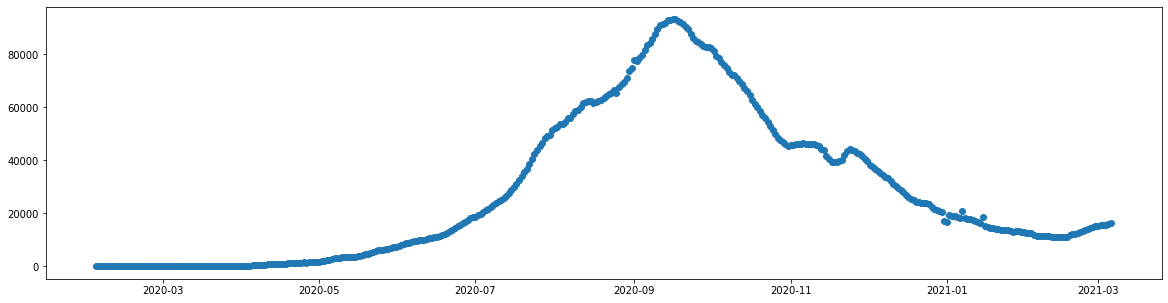

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(covid['ds'],covid['y'])
plt.show()

In [ ]:
# Fb Prophet

import fbprophet
op = fbprophet.Prophet(changepoint_prior_scale=1)
op.fit(covid)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = op.make_future_dataframe(periods = 365 ,freq = 'D')
forecast = op.predict(forecast)

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-04,-23.196297,-1827.401532,1894.461346
1,2020-02-05,-21.920743,-1962.816485,1850.913036
2,2020-02-06,-26.625024,-1688.484298,1807.869857
3,2020-02-07,4.273222,-1959.588096,1910.737462
4,2020-02-08,23.557538,-1818.103895,2055.160626
...,...,...,...,...
757,2022-03-02,-47425.833445,-775878.715587,703466.074982
758,2022-03-03,-47590.156835,-778732.895150,707328.253307
759,2022-03-04,-47718.877697,-780825.714764,710382.932278
760,2022-03-05,-47859.212490,-785425.972805,714275.446651


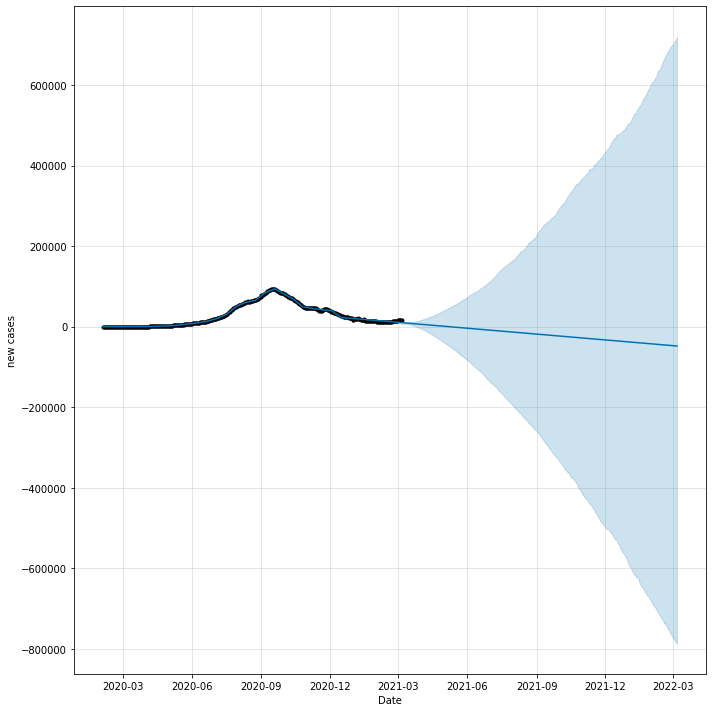

In [ ]:
op.plot(forecast,xlabel = 'Date',ylabel='new cases', figsize=(10,10));

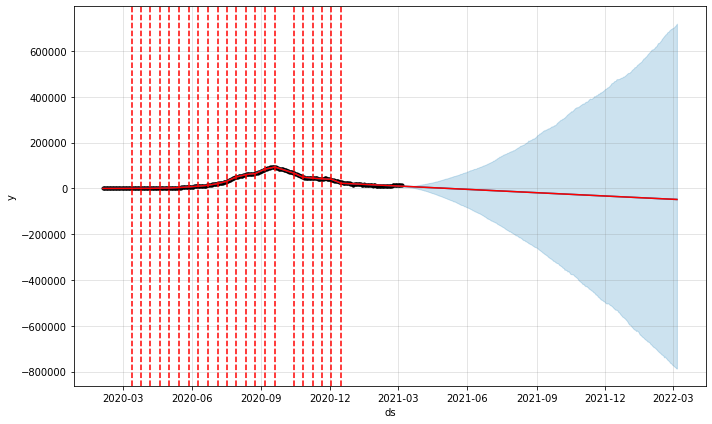

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = op.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), op, forecast)